# Ebene Parameterkurven - Aufgabe 3
In der Aufgabe 3 des Übungsblatts sollte als letzte Teilaufgabe eine grafische Ausgabe der Parameterkurve erstellt werden, in die wir Tangential- und Normalenvektoren einzeichnen.

Aus der Lösung zum Übungsblatt wissen wir, dass wir als Parameterintervall [-2, 2] verwenden. Wir implementieren eine Funktion mit den in der Aufgabenstellung angegebenen Funktionen f und g. Dabei importieren wir auch Numpy.

In [1]:
import numpy as np

def curvePoint(t):
    return t*(t*t - 2.0), t*(t-1.0)


def curve(a=-2.0, b=2.0, n=100):
    t = np.linspace(a, b, n)
    return curvePoint(t)

## Ausgabe der Kurve und von einigen Punkten
In der Aufgabe haben wir einige Parameterwerte t bestimmt, an denen die Kurve die Achsen schneidet oder an denen minimale oder maximale Koordinatenwerte entstehen. Wir speichern diese Parameterwerte in einem Array und geben die Punkte auf der Spur zu diesen Werten grafisch aus.

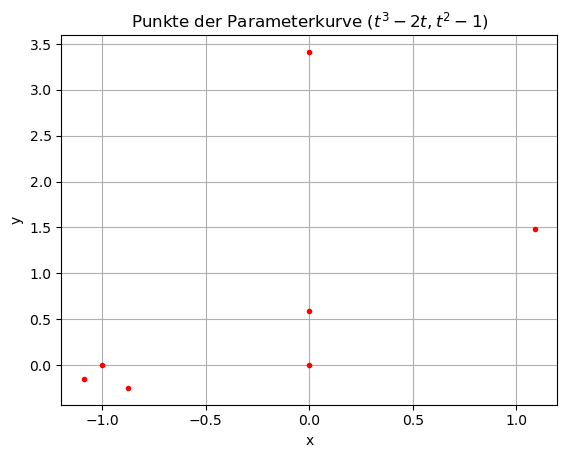

In [2]:
import matplotlib.pyplot as plt

tspecial = np.array([0.0, 1.0, -np.sqrt(2.0), np.sqrt(2.0), 0.5, -np.sqrt(6.0)/3.0, np.sqrt(6.0)/3.0])
xspecial, yspecial =  curvePoint(tspecial)    
              
fig = plt.figure()
plt.plot(xspecial, yspecial, 'ro', markersize=3.0)
plt.title('Punkte der Parameterkurve $(t^3-2t, t^2-1)$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show()           

Jetzt geben wir die Kurve grafisch aus, mit dem Parameterintervall, das wir schon mit Hilfe von Default-Argumenten vorbereitet haben.

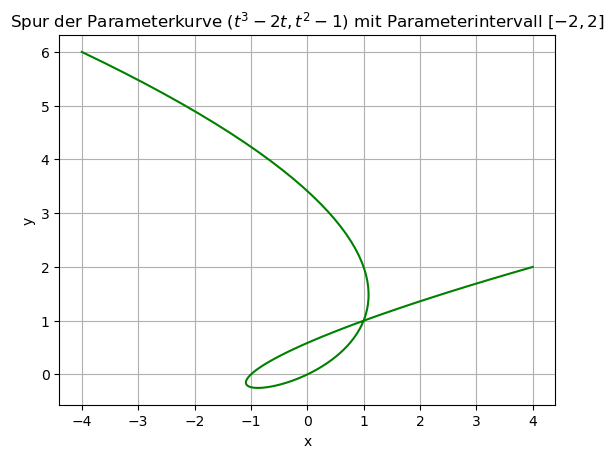

In [3]:
x, y = curve()

fig = plt.figure()
plt.plot(x, y, 'g-')
plt.title('Spur der Parameterkurve $(t^3-2t, t^2-1)$ mit Parameterintervall $[-2, 2]$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show() 

## Ausgabe von Tangenten und Normalen
Wir implementieren als erstes Funktionen, die den Geschwindigkeitsvektor, die Tangente oder die Normale für einen Parameterwert berechnen. Da wir anschließend die Funktion *arrow* in Matplotlib einsetzen geben diese Funktionen wie schon die Funktion *curve* x- und y-Werte zurück. Wir verwenden den Geschwindigkeitsvektor aus der Musterlösung. Für die Tangente bringen wir diesen Vektor auf Länge 1.

In [4]:
def speedVector(t):
    return 3.0*t*t - 2.0, 2.0*t - 1.0


def tangent(t):
    u = np.array(speedVector(t))
    # Wir erwarten eine reguläre Kurve!
    return u/np.linalg.norm(u)


def normal(t):
    u = tangent(t)
    n = np.array([-u[1], u[0]])
    return n/np.linalg.norm(n)

Der Funktion *arrow* übergeben wir den Anfangspunkt der Vektoren, dafür haben wir die Funktion *curvePoint* implementiert. Und als drittes und viertes Argument übergeben wir die Richtung, die wir mit den beiden Funktionen *tangent* und *normal* berechnen. Wir geben erst einmal eine Tangente und eine Normale am Punkt zu Parameterwert t=1.0 aus.

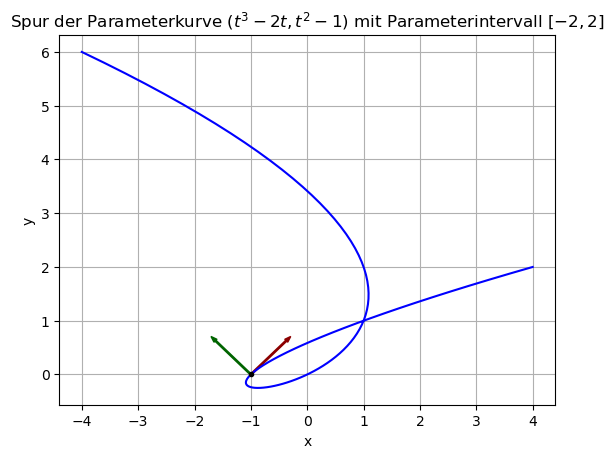

In [5]:
tt = tangent(1.0)
nn = normal(1.0)
point = curvePoint(1.0)

fig = plt.figure()
# Spur
plt.plot(x, y, 'b-')
# Punkt auf der Spur
plt.plot(point[0], point[1], 'ko', markersize=3.0)
# Tangente
plt.arrow(point[0], point[1], 
          tt[0], tt[1],
          width=0.025,
          length_includes_head=True,
          color="darkred"
         )
# Normale
plt.arrow(point[0], point[1], 
          nn[0], nn[1],
          width=0.025,
          length_includes_head=True,
          color="darkgreen"
         )
plt.title('Spur der Parameterkurve $(t^3-2t, t^2-1)$ mit Parameterintervall $[-2, 2]$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show() 

## Ausgabe  mehrerer Vektoren
Wollen wir mehr als einen Vektor ausgeben bietet es sich an die Funktion *quiver* einzusetzen. Wenn wir dieses Wort übersetzen finden wir den sehr passenden 
deutschen Begriff **Köcher**. Dieser Funktion können wir ganze Arrays von Start und Endpunkten übergeben.

Die Funktion *quiver* skaliert die Vektoren um zu gewährleisten, dass wir alle Vektoren erkennen können. Dazu definieren wir eine Variable *quiverSacle*. Bei der Interpretation der Grafik müssen wir das berücksichtigen, die Vektoren haben jetzt unterschiedliche Längen, sie sind keine Einheitsvektoren mehr.

(2, 7)


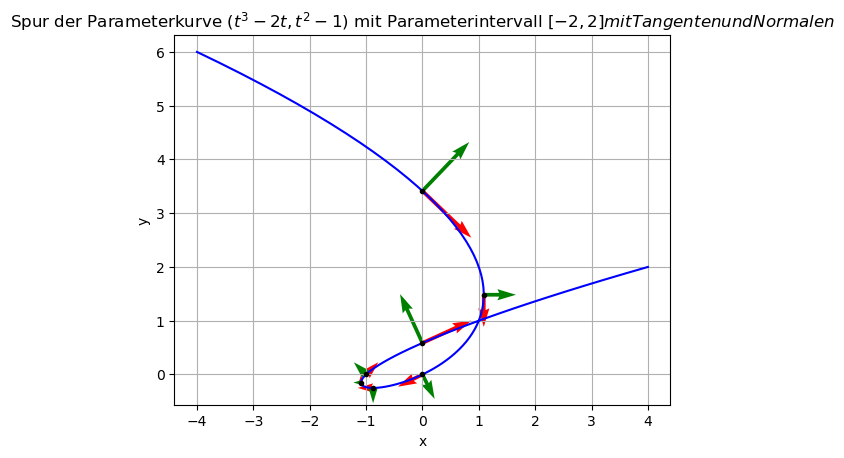

In [6]:
txy = tangent(tspecial)
print(txy.shape)

nxy = normal(tspecial)

quiverScale = 5

fig = plt.figure()
# Spur
plt.plot(x, y, 'b-')
# Punkt auf der Spur
plt.plot(xspecial, yspecial, 'ko', markersize=3.0)
# Tangenten
plt.quiver(xspecial, yspecial, 
           txy[0,:], txy[1,:],
           units='width',
           scale=quiverScale,
           pivot='tail',
           color='r')
# Normalen
plt.quiver(xspecial, yspecial, 
           nxy[0,:], nxy[1,:],
           units='width',
           scale=quiverScale,
           pivot='tail',
           color='g')

plt.title('Spur der Parameterkurve $(t^3-2t, t^2-1)$ mit Parameterintervall $[-2, 2] mit Tangenten und Normalen$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show() 